# Lab2

## ej1

Escribir una función que implemente el método de bisección para hallar una raíz de $ f : R 􏰀→ R $ en el intervalo [a,b]. La función debe llamarse “rbisec”, y tener como entrada los argumentos `(fun,I,err,mit)`, donde fun es una función que dado x retorna f(x), I= [a,b] es un intervalo en R, err es la tolerancia deseada del error y mit es el número máximo de iteraciones permitidas. El algoritmo debe finalizar en la k-esima iteración si |f(xk)| < err o si k ≥ mit. Los argumentos de salida deben ser (hx,hf) donde hx= [x1, . . . , xN ] es una lista que representa el historial de puntos medios y hf= [f(x1),...,f(xN)] el historial de los respectivos valores funcionales.

In [144]:
def rbisec(fun, I, err, mit):
    a, b = I
    hm, hf = [], []
     
    for i in range(1, mit+1):
        # get midpoint
        m = (a + b) / 2
        
        # save partial results
        hm.append(m), hf.append(fun(m))
        
        # check results using the abs error
        if (abs(fun(m)) < abs(err)):
            print(f'Found solution on iteration {i}')
            return hm, hf
        
        # find the new interval
        if fun(a)*fun(m) < 0:
            b = m
        elif fun(b)*fun(m) < 0:
            a = m
        else:
            print(f'Bisection failed on iteration {i}')
            return None, None
    
    print('Did not found solution')
    return hm, hf

In [145]:
f = lambda x: 0
hx, hf = rbisec(f, [-100, 100], 0.1, 10)

hx[-1], hf[-1]

Found solution on iteration 1


(0.0, 0)

In [146]:
f = lambda x:  x**2 - x - 1
hx, hf = rbisec(f, [1, 2], 1/(2^(-26)), 25)

hx[-1], hf[-1]

Found solution on iteration 3


(1.625, 0.015625)

## ej2
### a)
Encontrar la menor solución positiva de la ecuación $ 2x = tan(x) $ con un error menor a 10−5 en menos de 100 iteraciones.

¿Cuántas iteraciones son necesarias cuando comenzamos con el intervalo [0.8, 1.4]?

Usar la siguiente sintaxis:
```python
hx, hy = rbisec(fun_lab2ej2a, [0.8, 1.4], 1e-5, 100)
```

In [149]:
fun_lab2ej2a = math.tan
hx, hy = rbisec(fun_lab2ej2a, [0.8, 1.4], 1e-5, 100)

Bisection failed on iteration 1


El algoritmo fue preparado para fallar en caso de que no se pudiera encontrar una solución a la ecuación, la función $tan$ tiene raices en:

$$ x = \pi * \mathcal{n}, \mathcal{n} \in \mathbb{Z} $$

en este caso, no existen soluciones dentro del intervalo dado, ya que:

$$ 0\pi < 0.8 \land 1.4 < \pi $$

y por lo tanto, el algoritmo falla con la condición:

$$ (f(a)*f(m) > 0) \land (f(b)*f(m) > 0) $$

### b)

Encontrar una aproximación a $ \sqrt{3} $ con un error menor a $ 10^{-5} $.

In [156]:
fun_lab2ej2b = lambda x: x**2 - 3

hx, hy = rbisec(fun_lab2ej2b, [0, 3], 10**(-5), 20)
hx[-1], hf[-1]

Found solution on iteration 18


(1.7320518493652344, 0.015625)

In [157]:
math.sqrt(3)

1.7320508075688772

Casi . . .

### c)

Graficar conjuntamente $ f $ y los pares $ (xk,f(xk)) $ para las dos funciones anteriores y con al menos dos intervalos iniciales distintos para cada una.

Found solution on iteration 11


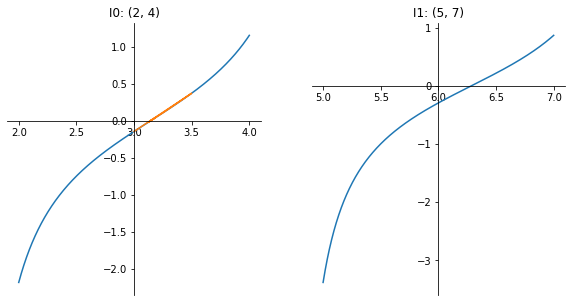

In [200]:
# plot tan
import matplotlib.pyplot as plt
import numpy as np

# define our intervals
I_0 = (2, 4)
I_1 = (5, 7)

# create the samples between this intervals
I_0_x = np.linspace(*I_0, 1000)
I_1_x = np.linspace(*I_1, 1000)

# get the real function value between this intervals
I_0_r = np.array([fun_lab2ej2a(x) for x in I_0_x])
I_1_r = np.array([fun_lab2ej2a(x) for x in I_1_x])

# get our own results using bisec
I_0_hx, I_0_hf = rbisec(fun_lab2ej2a, I_0, 10**(-5), 100)

# axes setup helper
def set_ax_zero(a):
    a.spines['left'].set_position('center')
    a.spines['bottom'].set_position('zero')
    a.spines['right'].set_color('none')
    a.spines['top'].set_color('none')
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('left')

# create matplotlib fig and axes
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot the real results
ax[0].plot(I_0_x, I_0_r)
ax[0].plot(I_0_hx, I_0_hf)
ax[0].no
ax[0].set_title(f'I0: {I_0}')

ax[1].plot(I_1_x, I_1_r)
ax[1].set_title(f'I1: {I_1}')

# setup all axes
set_ax_zero(ax[0])
set_ax_zero(ax[1])

plt.show()